# **Data merging: TARGET, IFFT, TI, BRANCHES, INDEXES**

**RELEASE**

In [1]:
REL = '_R004'

## **Importing libraries and connecting disk, global ads**

Connecting disk

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Collecting own modules

In [3]:
import sys
sys.path.append('/gdrive/My Drive/Release')
import Modules.global_f as mgf

Talib installing

In [4]:
# installing talib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2021-04-26 07:45:43--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-26 07:45:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-26 07:45:43--  https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newcon

Importing libraries

In [5]:
# importing libraries
import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import talib

import warnings
warnings.filterwarnings("ignore")

Пути к директориям с файлами и с данными

In [29]:
DATA_PATH = '/gdrive/My Drive/Data/'
INDEXES_PATH = '/gdrive/My Drive/Data/Raw_data/Indexes/'
BRANCHES_PATH = '/gdrive/My Drive/Data//Raw_data/Branches/'

Functions

In [30]:
def get_technical_indicators(dataset):
    # Create 7, 14 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7).mean()
    dataset['ma14'] = dataset['price'].rolling(window=14).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['price'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['price'].rolling(20).std(ddof=1)
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()

    # Create Weighted moving average
    dataset['wma'] = talib.WMA(dataset['price'])

    # Create Kaufman Adaptive Moving Average
    dataset['KAMA'] = talib.KAMA(dataset['price'])

    # Create Double Exponential Moving Average
    dataset['DEMA'] = talib.DEMA(dataset['price'])
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])

    # Create RSI
    dataset['RSI'] = talib.RSI(dataset['price'], timeperiod=14)

    # Create Stoch
    dataset['Stochk'], dataset['Stochd'] = talib.STOCH(dataset['Max'], dataset['Min'], dataset['price'])
    dataset['Stoch RSIk'], dataset['Stoch RSId'] = talib.STOCHRSI(dataset['price'], timeperiod=14)
   
    # Create ADX
    dataset['ADX'] = talib.ADX(dataset['Max'], dataset['Min'], dataset['price'])
    dataset['ADXR'] = talib.ADXR(dataset['Max'], dataset['Min'], dataset['price'])

    # Create Directional Movement Index
    dataset['DX'] = talib.DX(dataset['Max'], dataset['Min'], dataset['price'])

    # Create Williams %R
    dataset['WillR'] = talib.WILLR(dataset['Max'], dataset['Min'], dataset['price'], timeperiod=14)

    # Create CCI
    dataset['CCI'] = talib.CCI(dataset['Max'], dataset['Min'], dataset['price'], timeperiod=14)

    # Create ATR
    dataset['ATR'] = talib.ATR(dataset['Max'], dataset['Min'], dataset['price'], timeperiod=14)
    dataset['NATR'] = talib.NATR(dataset['Max'], dataset['Min'], dataset['price'], timeperiod=14)

    # Create ULTOSC
    dataset['ULTOSC'] = talib.ULTOSC(dataset['Max'], dataset['Min'], dataset['price'])

    # Create ROC
    dataset['ROC'] = talib.ROC(dataset['price'])

    # Create BOP
    dataset['BOP'] = talib.BOP(dataset['Open'], dataset['Max'], dataset['Min'], dataset['price'])

    # Create Aroon
    dataset['Aroondown'], dataset['Aroonup'] = talib.AROON(dataset['Max'], dataset['Min'])
    dataset['AroonOSC'] = talib.AROONOSC(dataset['Max'], dataset['Min'])

    # Create some Oscillators
    dataset['APO'] = talib.APO(dataset['price'])
    dataset['PPO'] = talib.PPO(dataset['price'])
    dataset['CMO'] = talib.CMO(dataset['price'])

    return dataset

## **Task implementation**

###**Loading data**

In [31]:
# GS - the close price
dataset_ex_df = pd.read_csv(DATA_PATH + 'GS.csv', index_col=[0], parse_dates=[0], date_parser=mgf.parser, decimal=',', thousands='.')
dataset_ex_df.head(3)

,GS,Open,Max,Min,Vol mln,change %
Date,,,,,,
2021-03-19,344.20,346.42,347.24,340.63,"3,51",-1.09
2021-03-18,348.00,349.53,356.83,347.02,"3,72",0.88
2021-03-17,344.95,344.28,346.98,340.51,"2,71",0.95


In [32]:
dataset_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565 entries, 2021-03-19 to 2011-01-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GS        2565 non-null   float64
 1   Open      2565 non-null   float64
 2   Max       2565 non-null   float64
 3   Min       2565 non-null   float64
 4   Vol mln   2565 non-null   object 
 5   change %  2565 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.3+ KB


In [33]:
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 2565 number of days in the dataset.


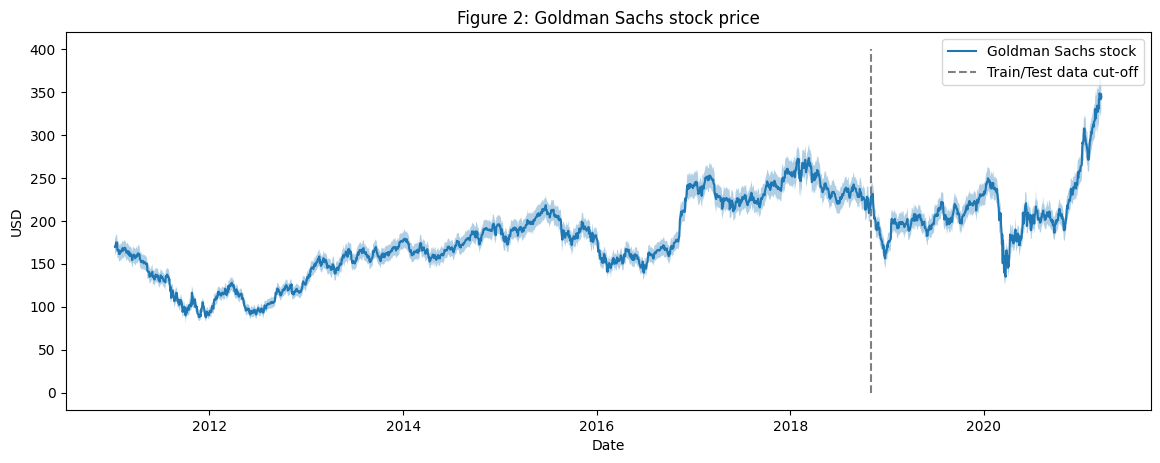

In [51]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df.index, dataset_ex_df['GS'], label='Goldman Sachs stock')
plt.vlines(datetime.date(2018, 11, 1), 0, 400, linestyles='--', colors='gray', label='Train/Test data cut-off')
#plt.fill_between(dataset_ex_df.index, 0.95*dataset_ex_df['Min'], 1.05*dataset_ex_df['Max'], alpha=0.35)
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Goldman Sachs stock price')
plt.legend()
plt.show()

In [52]:
num_training_days = int(dataset_ex_df.shape[0]*.66)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    dataset_ex_df.shape[0]-num_training_days))

Number of training days: 1692. Number of test days: 873.


###**Getting technical indicators**

In [54]:
dataset_ex_df.rename(columns={'GS': 'price'}, inplace=True)
dataset_ex_df = dataset_ex_df.sort_values(by='Date')
dataset_TI_df = get_technical_indicators(dataset_ex_df)
dataset_TI_df.reset_index(inplace=True)
dataset_TI_df.head(10)

,Date,price,Open,Max,Min,Vol mln,change %,ma7,ma14,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,wma,KAMA,DEMA,momentum,log_momentum,RSI,Stochk,Stochd,Stoch RSIk,Stoch RSId,ADX,ADXR,DX,WillR,CCI,ATR,NATR,ULTOSC,ROC,BOP,Aroondown,Aroonup,AroonOSC,APO,PPO,CMO
0,2011-01-10,169.76,170.00,171.29,169.20,"3,66",-0.54,NaN,NaN,NaN,169.760000,169.760000,0.000000,NaN,NaN,NaN,169.760000,NaN,NaN,NaN,168.76,5.128478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.114833,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-11,169.36,170.50,171.43,168.32,"4,57",-0.24,NaN,NaN,NaN,169.552308,169.543333,-0.008974,NaN,NaN,NaN,169.460000,NaN,NaN,NaN,168.36,5.126105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.366559,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-12,171.67,169.39,172.31,169.18,"5,59",1.36,NaN,NaN,NaN,170.313174,170.373372,0.060198,NaN,NaN,NaN,170.990000,NaN,NaN,NaN,170.67,5.139732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728435,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-13,171.57,172.04,172.60,171.00,"3,18",-0.06,NaN,NaN,NaN,170.664528,170.751101,0.086573,NaN,NaN,NaN,171.381500,NaN,NaN,NaN,170.57,5.139146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.293750,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-14,175.00,171.19,175.00,171.19,"5,89",2.00,NaN,NaN,NaN,171.669942,171.905511,0.235570,NaN,NaN,NaN,173.803802,NaN,NaN,NaN,174.00,5.159055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-18,174.68,174.75,175.34,173.05,"4,98",-0.18,NaN,NaN,NaN,172.272832,172.579858,0.307026,NaN,NaN,NaN,174.388736,NaN,NaN,NaN,173.68,5.157215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030568,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-01-19,166.49,169.46,171.49,165.86,"13,37",-4.69,171.218571,NaN,NaN,171.244386,171.220928,-0.023458,NaN,NaN,NaN,169.120503,NaN,NaN,NaN,165.49,5.108911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.527531,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-01-20,165.69,166.55,167.06,164.01,"8,92",-0.48,170.637143,NaN,NaN,170.349436,170.066708,-0.282728,NaN,NaN,NaN,166.833152,NaN,NaN,NaN,164.69,5.104065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.281967,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-01-21,166.20,165.88,169.20,165.12,"5,88",0.31,170.185714,NaN,NaN,169.734399,169.301736,-0.432663,NaN,NaN,NaN,166.411029,NaN,NaN,NaN,165.20,5.107157,NaN,13.600892,38.902032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078431,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-01-24,166.30,165.99,167.07,165.75,"4,63",0.06,169.418571,NaN,NaN,169.260485,168.732908,-0.527577,NaN,NaN,NaN,166.337009,NaN,NaN,NaN,165.30,5.107762,NaN,18.122977,23.027040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234848,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['price'], label='Closing Price', color='b')
    plt.plot(dataset['ma7'], label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['ma14'], label='MA 14', color='orange',linestyle='--')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'], label='Upper Band', color='c')
    plt.plot(dataset['lower_band'], label='Lower Band', color='c')
    plt.plot(dataset['12ema'], label='12ema')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'], label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

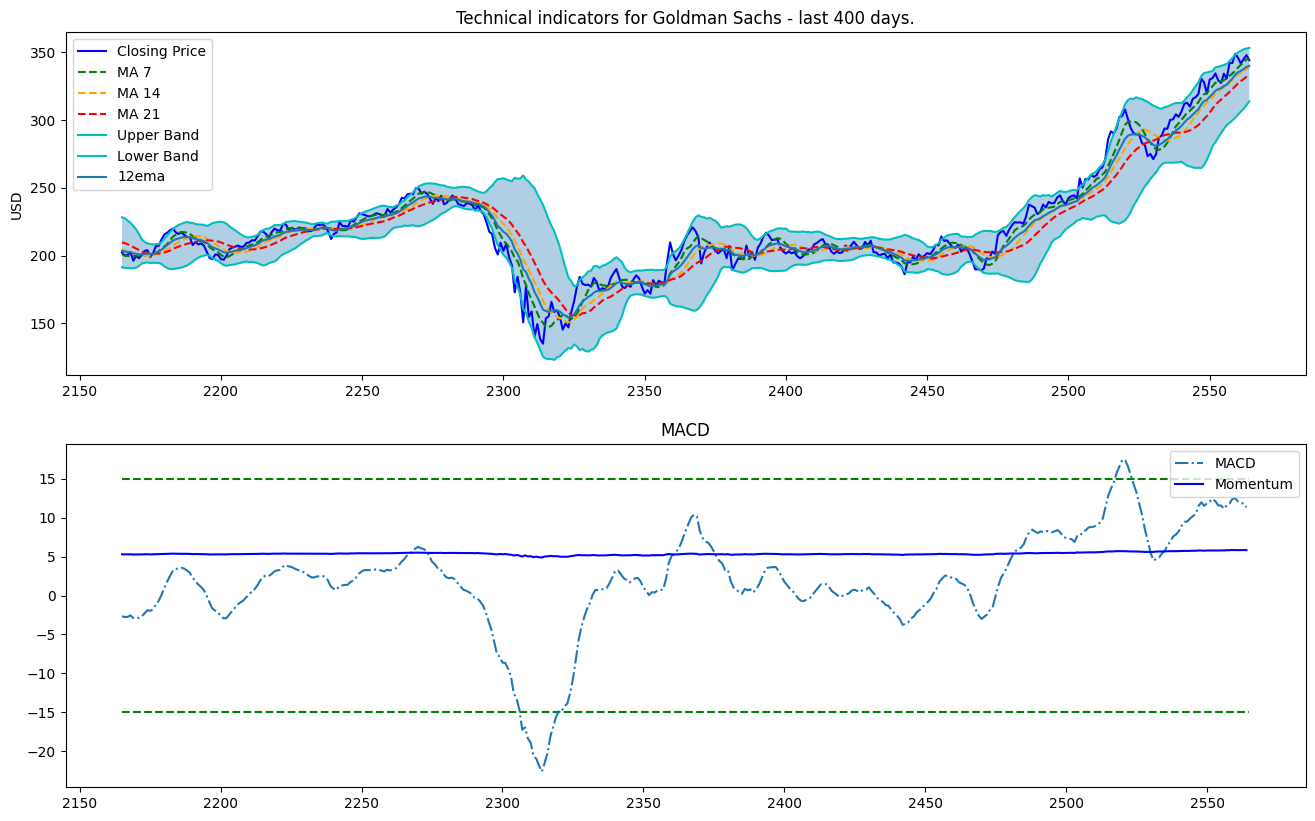

In [59]:
plot_technical_indicators(dataset_TI_df, 400)

### **Getting features from the Fourier transformation of target (GS)**

In [63]:
data_FT = dataset_ex_df[['price']]
data_FT.head(2)

,price
0,169.76
1,169.36


In [64]:
close_fft = np.fft.fft(np.asarray(data_FT['price'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_df.head(3)

,fft,absolute,angle
0,471432.790000+0.000000j,471432.790000,0.000000
1,-16847.478177+55338.317465j,57846.062102,1.866326
2,-3784.238387+20158.054980j,20510.183830,1.756365


In [70]:
print(fft_df.shape)
print(dataset_TI_df.shape)

(2565, 3)
(2565, 43)


In [157]:
# plt.figure(figsize=(14, 7), dpi=100)
close_fft = np.fft.fft(np.asarray(data_FT['price'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_df.head(3)
fft_list = np.asarray(fft_df['fft'].tolist())
ifft_res = {}
for num_ in [3, 6, 9, 100]:  # числа убирают из центра часточного распределения num_ компонент fft
    fft_list_filtered= np.copy(fft_list)
    fft_list_filtered[num_:-num_] = 0
    ifft_  = np.fft.ifft(fft_list_filtered)
    ifft_df = pd.DataFrame({'ifft':ifft_})
    ifft_df['absolute'] = ifft_df['ifft'].apply(lambda x: np.abs(x))
    ifft_res.update({num_: ifft_df['absolute']})
#     plt.plot(ifft_res[num_], label='Fourier transform with {} components'.format(num_))
# plt.plot(data_FT['price'],  label='Real', alpha = 0.65)
# plt.xlabel('Days')
# plt.ylabel('USD')
# plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
# plt.legend()
# plt.show()
print(len(ifft_res), len(ifft_res[3]))
i =0
ifft_df = pd.DataFrame()
for num_ in list(ifft_res.keys()):
  # print(ifft_res[num_])
  # print(ifft_res[num_].shape) 
  if i == 0:
    ifft_df = pd.DataFrame({'ifft_'+str(num_):ifft_res[num_]})
  else:
    df_ = pd.DataFrame({'ifft_'+str(num_):ifft_res[num_]})
    ifft_df = pd.concat([df_, ifft_df], axis=1)
  i += 1


4 2565


In [158]:
dataset_TI_df.reset_index()
df1 = dataset_TI_df.copy()
for num_ in list(ifft_res.keys()):
  # print(ifft_res[num_])
  # print(ifft_res[num_].shape) 
  ifft_df = pd.DataFrame({'ifft_'+str(num_):ifft_res[num_]})
  df = pd.concat([df1, ifft_df], axis=1)
  df1 = df.copy()
df_TI_IFFT = df1.copy()
df_TI_IFFT.tail(10)

,Date,price,Open,Max,Min,Vol mln,change %,ma7,ma14,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,wma,KAMA,DEMA,momentum,log_momentum,RSI,Stochk,Stochd,Stoch RSIk,Stoch RSId,ADX,ADXR,DX,WillR,CCI,ATR,NATR,ULTOSC,ROC,BOP,Aroondown,Aroonup,AroonOSC,APO,PPO,CMO,ifft_3,ifft_6,ifft_9,ifft_100
2555,2021-03-08,334.19,331.04,337.59,329.11,3,2.08,329.374286,324.168571,317.016667,313.566875,325.138258,11.571383,11.806088,340.628842,293.404492,332.262353,316.951183,310.655632,332.528361,333.19,5.808713,68.324217,56.781057,58.952111,47.939976,23.235580,40.415697,40.055601,16.841893,-18.046972,85.829554,9.380616,2.806971,50.590984,5.465964,0.371462,14.285714,78.571429,64.285714,15.828462,5.098036,36.648433,181.856196,211.116449,235.684691,346.379215
2556,2021-03-09,330.59,328.80,336.39,325.80,"3,32",-1.08,330.961429,325.443571,318.782857,314.827847,325.976988,11.149140,11.309351,341.401559,296.164156,331.147451,318.525441,312.303234,333.616765,329.59,5.797849,64.356859,60.486494,57.804857,0.000000,15.979992,38.276199,39.343713,10.462719,-29.171817,54.940044,9.467001,2.863668,53.156595,3.565051,0.169027,7.142857,71.428571,64.285714,14.790577,4.728945,28.713717,181.648862,210.773873,235.142224,342.499216
2557,2021-03-10,342.02,331.98,342.37,331.97,"3,15",3.46,332.690000,327.737857,320.776667,316.842081,328.445143,11.603062,11.403058,343.582782,297.970551,338.395817,320.734860,315.469023,335.983925,341.02,5.831941,70.261281,77.940333,65.069295,100.000000,49.313325,36.903646,39.083023,19.060462,-1.088986,128.989532,9.632215,2.816272,55.354907,3.441810,0.965385,0.000000,100.000000,100.000000,14.298333,4.534044,40.522561,181.441038,210.427826,234.588090,337.067864
2558,2021-03-11,342.10,339.18,344.98,336.79,"2,76",0.02,334.284286,329.629286,322.759524,318.713038,330.545891,11.832853,11.481688,345.722900,299.796148,340.865272,322.819849,319.366117,338.090611,341.10,5.832176,70.298367,82.833360,73.753396,100.000000,66.666667,35.878802,39.108189,22.555833,-8.372093,143.402987,9.529200,2.785501,57.534714,4.375153,0.356532,0.000000,100.000000,100.000000,14.085449,4.436706,40.596733,181.232729,210.078324,234.022383,330.117454
2559,2021-03-12,348.81,344.61,349.96,343.64,"2,44",1.96,336.338571,331.910714,324.880000,320.942443,333.355754,12.413311,11.633956,348.147913,301.612087,346.161757,325.189849,323.915717,340.788801,347.81,5.851656,73.305340,94.597020,85.123571,100.000000,100.000000,35.378024,39.026356,28.867901,-2.920264,185.716103,9.409971,2.697735,60.836872,9.180543,0.664557,7.142857,100.000000,92.857143,13.281923,4.153287,46.610680,181.023937,209.725382,233.445201,321.724439
2560,2021-03-15,346.05,349.40,352.42,342.06,"2,28",-0.79,338.732857,333.827857,326.962381,322.802262,335.308715,12.506453,11.486309,349.934999,303.989762,346.087252,327.223097,327.468726,342.838815,345.05,5.843689,70.159012,87.070838,88.167073,64.839536,88.279845,35.124158,39.456874,31.823909,-17.714127,146.957195,9.477830,2.738862,60.958016,4.889064,-0.323359,0.000000,100.000000,100.000000,12.794551,3.975876,40.318025,180.814667,209.369016,232.856643,312.008027
2561,2021-03-16,341.71,345.84,346.61,337.75,"2,33",-1.25,340.781429,334.618571,328.647619,324.202835,336.293528,12.090693,11.223864,351.095347,306.199891,343.169084,328.815312,329.349931,344.104273,340.71,5.831032,65.405160,72.979684,84.882514,0.000000,54.946512,34.203807,39.650698,22.239234,-29.783092,77.432545,9.433700,2.760733,59.385977,3.254366,-0.466140,50.000000,92.857143,42.857143,12.792821,3.952563,30.810321,180.604922,209.009240,232.256813,301.127169
2562,2021-03-17,344.95,344.28,346.98,340.51,"2,71",0.95,342.318571,335.846429,330.218571,325.739662,337.625293,11.885631,11.003869,352.226310,308.210833,344.356361,330.472516,331.172199,345.606327,343.95,5.840496,67.192376,58.635426,72.895316,22.622468,29.154001,33.386281,39.100816,22.758445,-20.773081,84.923002,9.222007,2.673433,60.259062,3.145651,0.103555,42.857143,85.714286,42.857143,12.322244,3.787009,34.384752,180.394707,208.646073,231.645818,289.276

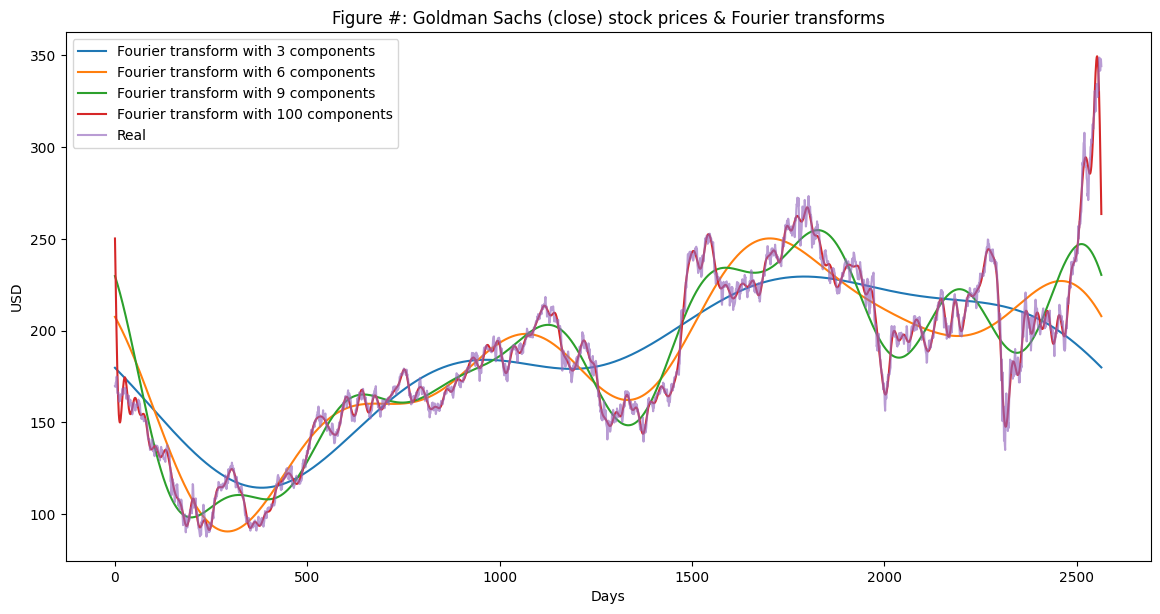

In [159]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
ifft_res = {}
for num_ in [3, 6, 9, 100]:
    plt.plot(df_TI_IFFT['ifft_'+str(num_)], label='Fourier transform with {} components'.format(num_))
plt.plot(df_TI_IFFT['price'],  label='Real', alpha = 0.65)
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure #: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

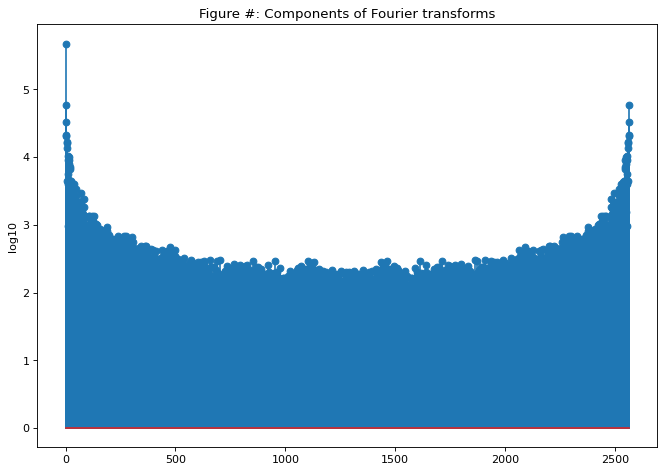

In [ ]:
from collections import deque
items = deque(np.log10(np.asarray(fft_df['absolute'].tolist())))
#items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure #: Components of Fourier transforms')
plt.ylabel('log10')
plt.show()

###**Compiling all data**

In [ ]:
# compliting data
dataset_stocks_all = pd.read_csv(DATA_PATH + 'Raw_Data_Processing_(INXs_BRHs)_R004.csv')
dataset_stocks_all['Date'] =  pd.to_datetime(dataset_stocks_all['Date'], format='%Y-%m-%d')
dataset_stocks_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 78 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3638 non-null   datetime64[ns]
 1   dow-jones                                                      2521 non-null   float64       
 2   s-p-500                                                        2526 non-null   float64       
 3   dax                                                            2521 non-null   float64       
 4   nasdaq-composite                                               2517 non-null   float64       
 5   ftse-100                                                       2524 non-null   float64       
 6   cac-40                                                         2548 non-null   float64       
 7

In [ ]:
dataset_total = df_TI_IFFT.merge(dataset_stocks_all, on='Date', how='left')
dataset_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2565 entries, 0 to 2564
Columns: 124 entries, Date to NYSE  Composite
dtypes: datetime64[ns](1), float64(122), object(1)
memory usage: 2.4+ MB


In [ ]:
dataset_total.sample(5)

,Date,price,Open,Max,Min,Vol mln,change %,ma7,ma14,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,wma,KAMA,DEMA,momentum,log_momentum,RSI,Stochk,Stochd,Stoch RSIk,Stoch RSId,ADX,ADXR,DX,WillR,CCI,ATR,NATR,ULTOSC,ROC,BOP,Aroondown,Aroonup,AroonOSC,...,USD_JPY,comstage-nyse-arca-gold-bugs-ucits-etf-(usd),Dow Jones Basic Materials,Dow Jones Consumer Goods,Dow Jones Consumer Services,Dow Jones Financials,Dow Jones Health Care,Dow Jones Industrials,Dow Jones Oil & Gas,Dow Jones Technology,Dow Jones Telecommunications,Dow Jones Utilities,NYSE Energy,NYSE Financials,NYSE Healthcare,NYSE TMT,Philadelphia Semiconductor Index,NASDAQ Bank,NASDAQ Biotechnology,NASDAQ Computer,NASDAQ Financial 100,NASDAQ Health Care,NASDAQ Industrial,NASDAQ Insurance,NASDAQ Internet,NASDAQ Other Finance,NASDAQ Telecommunications,NASDAQ Transportation,S&P 500 Utilities,S&P 500 Consumer Discretionary,S&P 500 Consumer Staples,S&P 500 Energy,S&P 500 Financials,S&P 500 Health Care,S&P 500 Industrials,S&P 500 Information Technology,S&P 500 Materials,S&P 500 Real Estate,S&P 500 Telecom Services,NYSE Composite
615,2013-06-21,154.25,157.00,157.26,152.30,"5,39",-0.75,161.174286,161.896429,161.725714,159.408052,160.539756,1.131704,3.375045,168.475804,154.975624,155.413075,161.284753,160.151322,163.040653,153.25,5.032071,41.761731,9.617698,25.017438,0.000000,4.973799e-14,27.665097,31.035847,19.144722,-87.735849,-185.132690,4.048812,2.624838,38.297564,-7.083911,-0.554435,100.000000,35.714286,-64.285714,...,97.90,0.0,275.12,428.01,508.24,349.85,499.05,398.59,663.12,757.50,158.65,181.82,12798.39,5564.96,9064.19,6293.67,460.85,2151.9,1758.5,1608.49,2633.2,422.9,3004.3,5609.8,277.5,4929.6,229.4,2547.8,185.85,436.55,407.98,576.99,257.96,547.73,367.24,490.13,245.17,149.75,154.27,9018.55
780,2014-02-18,164.65,164.04,165.59,163.72,"3,43",0.57,163.321429,162.918571,165.397619,166.353179,164.051541,-2.301637,3.880411,173.158442,157.636796,164.355127,165.663699,168.281054,163.961506,163.65,5.097730,45.350197,76.034403,74.582883,100.000000,9.589589e+01,38.591024,37.017140,17.286127,-23.750000,79.936259,2.647883,1.608189,55.151356,3.022150,0.326203,28.571429,0.000000,-28.571429,...,102.37,0.0,326.92,463.56,606.95,396.64,623.76,480.85,729.63,929.69,155.45,200.13,14207.31,6291.17,10730.26,7113.69,560.45,2532.5,2759.8,2095.78,3003.0,621.4,3676.1,5978.0,418.2,5671.0,248.4,2995.4,204.57,517.36,426.38,629.11,291.69,679.01,442.12,593.24,291.00,158.27,146.65,10319.12
1830,2018-04-19,254.17,254.00,256.16,252.83,"3,99",0.07,255.447143,253.801429,253.157143,255.882304,254.711905,-1.170399,3.673702,260.504546,245.809740,254.212368,254.734344,256.209402,253.986077,253.17,5.534061,48.008068,22.005770,35.717149,14.187216,1.012191e+01,20.053666,20.532262,17.523157,-44.474106,8.883412,6.864828,2.700880,42.021445,-0.641101,0.051051,7.142857,71.428571,64.285714,...,107.38,0.0,408.36,585.10,944.48,586.33,887.03,718.10,607.96,1781.95,163.40,255.66,11895.50,8074.04,14251.02,8495.47,1285.88,4096.5,3328.3,4276.94,4663.6,768.1,5845.2,8400.1,781.9,8130.5,366.8,5226.2,257.31,827.99,526.75,544.26,462.64,955.01,638.26,1172.42,371.51,188.21,151.04,12671.48
2032,2019-02-07,193.07,195.28,195.88,191.05,"2,95",-1.81,197.492857,198.452143,193.453810,191.832828,195.921343,4.088514,8.714053,210.881915,176.025704,194.393626,193.040215,185.841334,194.498672,192.07,5.257860,52.152938,28.534806,28.279628,0.000000,5.505538e+00,27.234576,25.889498,4.246420,-83.496732,-208.053824,4.821259,2.497156,48.209067,-2.391304,-0.457557,100.000000,57.142857,-42.857143,...,109.81,0.0,353.41,573.91,990.85,575.66,965.42,701.75,516.53,1815.87,158.49,279.90,10311.32,7608.83,15632.36,8472.76,1303.92,3717.5,3369.3,4304.04,4488.4,802.3,5936.1,8664.9,751.5,7876.4,372.6,5046.0,281.00,847.81,549.64,467.21,427.88,1038.49,613.43,1185.04,330.47,214.29,151.20,12295.22
595,2013-05-23,157.41,156.36,158.89,154.62,"5,62",-1.21,157.805714,153.890000,150.769524,151.610149,155.150666,3.540517,5.842505,162.454534,139.084514,158.116134,151.365978,150.4

In [ ]:
list(dataset_total.columns)

['Date',
 'price',
 'Open',
 'Max',
 'Min',
 'Vol mln',
 'change %',
 'ma7',
 'ma14',
 'ma21',
 '26ema',
 '12ema',
 'MACD',
 '20sd',
 'upper_band',
 'lower_band',
 'ema',
 'wma',
 'KAMA',
 'DEMA',
 'momentum',
 'log_momentum',
 'RSI',
 'Stochk',
 'Stochd',
 'Stoch RSIk',
 'Stoch RSId',
 'ADX',
 'ADXR',
 'DX',
 'WillR',
 'CCI',
 'ATR',
 'NATR',
 'ULTOSC',
 'ROC',
 'BOP',
 'Aroondown',
 'Aroonup',
 'AroonOSC',
 'APO',
 'PPO',
 'CMO',
 'ifft_3',
 'ifft_6',
 'ifft_9',
 'ifft_100',
 'dow-jones',
 's-p-500',
 'dax',
 'nasdaq-composite',
 'ftse-100',
 'cac-40',
 'nikkei-225',
 'sse-composite',
 'hang-seng',
 'kospi',
 'bse-sensex',
 'bovespa',
 'merval',
 'vix-index',
 'индекс-мосбиржи',
 'bitcoin',
 'ifx-cbonds',
 'ртс',
 'нефть-brent',
 'msci-world-index',
 's-p_tsx-composite',
 'asx-200',
 'kase-(казахстан)',
 'ux-(украина)',
 'золото-(лондон)',
 'серебро-(лондон)',
 'платина-(лондон)',
 'палладий-(лондон)',
 'LIBOR USD',
 'LIBOR EUR',
 'LIBOR GBP',
 'LIBOR CHF',
 'LIBOR JPY',
 'alps-aler

Saving data

In [ ]:
dataset_total.to_csv(DATA_PATH+'Collector_Features_(DT_GS_TI_FFTs_INXs_BRHs)' + REL +'.csv', index=None)